In [35]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import os

In [36]:
def plot_hetmap(df_interp):
    fp = "PE/26MUE250GC_SIR.shp"
    map_df = gpd.read_file(fp, encoding="utf-8")
    map_df_cleaned = map_df[map_df.NM_MUNICIP != "FERNANDO DE NORONHA"]
    merged = map_df_cleaned.set_index('NM_MUNICIP').join(df_interp.set_index('Estacao'))
    variable = 'predict_precipitation_normalized'
    vmin, vmax = 0, merged.predict_precipitation_normalized.max()
    fig, ax = plt.subplots(1, figsize=(10, 6))
    merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
    ax.axis('off')
    ax.set_title('Chuva em Pernambuco '+ str(df_interp.Data.unique()[0]), \
              fontdict={'fontsize': '22',
                        'fontweight' : '10'})


    ax.annotate('Source: Pernambuco, '+ str(df_interp.year.unique()[0]),
           xy=(0.1, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=10, color='#555555')

    sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm._A = []
    cbar = fig.colorbar(sm)
    if os.path.isdir(os.getcwd() + "/mapas/" + str(df_interp.year.unique()[0])) == False:
        os.mkdir(os.getcwd() + "/mapas/" + str(df_interp.year.unique()[0]))
    name_map = df_interp.Date.unique()[0]
    fig.savefig('mapas/'+ str(df_interp.year.unique()[0]) +'/heatmap_'+ name_map +'.png', dpi=300)

## Carregando dados diários interpolados de 2015-2017

In [37]:
interpolation_days_2015_2017 = pd.read_csv('interpolation_data/interpolation_days_2015_2017.csv', delimiter=',', encoding='utf-8')

In [38]:
interpolation_days_2015_2017.head()

,Unnamed: 0,Estacao,predict_precipitation_normalized,Data,Date,year,month,day,long,lat
0,0,ABREU E LIMA,1.154171,01/01/2015,2015-01-01,2015,1,1,-34.95,-8.05
1,1,AFOGADOS DA INGAZEIRA,0.415370,01/01/2015,2015-01-01,2015,1,1,-34.95,-8.05
2,2,AFRÂNIO,0.292119,01/01/2015,2015-01-01,2015,1,1,-34.95,-8.05
3,3,AGRESTINA,0.775791,01/01/2015,2015-01-01,2015,1,1,-34.95,-8.05
4,4,ÁGUA PRETA,0.946253,01/01/2015,2015-01-01,2015,1,1,-34.95,-8.05


# Selecionando o dia 01/01/2017

In [39]:
df_2017_01_01 = interpolation_days_2015_2017[interpolation_days_2015_2017["Date"] == "2017-01-01"]

In [40]:
df_2017_01_01.head()

,Unnamed: 0,Estacao,predict_precipitation_normalized,Data,Date,year,month,day,long,lat
134136,0,ABREU E LIMA,1.466834,01/01/2017,2017-01-01,2017,1,1,-34.95,-8.05
134137,1,AFOGADOS DA INGAZEIRA,0.014630,01/01/2017,2017-01-01,2017,1,1,-34.95,-8.05
134138,2,AFRÂNIO,0.029601,01/01/2017,2017-01-01,2017,1,1,-34.95,-8.05
134139,3,AGRESTINA,0.420929,01/01/2017,2017-01-01,2017,1,1,-34.95,-8.05
134140,4,ÁGUA PRETA,0.942260,01/01/2017,2017-01-01,2017,1,1,-34.95,-8.05


## Plotando mapa da precipitação no dia 01/01/2017

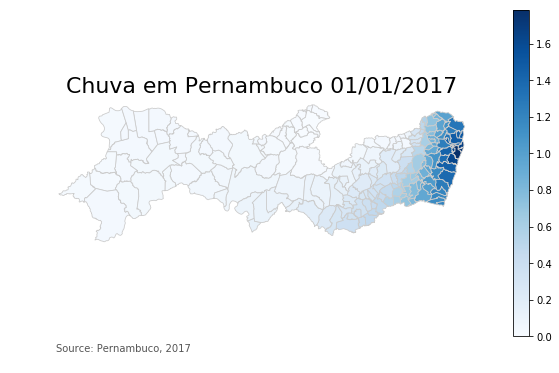

In [41]:
plot_hetmap(df_2017_01_01)

In [42]:
def build_hetmap_day(df, date):
    print(date)
    df_day = df[df["Date"] == date]
    plot_hetmap(df_day)

In [43]:
interpolation_days_2015_2017.head()

,Unnamed: 0,Estacao,predict_precipitation_normalized,Data,Date,year,month,day,long,lat
0,0,ABREU E LIMA,1.154171,01/01/2015,2015-01-01,2015,1,1,-34.95,-8.05
1,1,AFOGADOS DA INGAZEIRA,0.415370,01/01/2015,2015-01-01,2015,1,1,-34.95,-8.05
2,2,AFRÂNIO,0.292119,01/01/2015,2015-01-01,2015,1,1,-34.95,-8.05
3,3,AGRESTINA,0.775791,01/01/2015,2015-01-01,2015,1,1,-34.95,-8.05
4,4,ÁGUA PRETA,0.946253,01/01/2015,2015-01-01,2015,1,1,-34.95,-8.05


## Selecionando dados do mês de Janeiro de 2017

In [44]:
df_2017_1 = interpolation_days_2015_2017[(interpolation_days_2015_2017["year"] == 2017) & (interpolation_days_2015_2017["month"] == 1)]

## Gerando e salvando os mapas de calor de Janeiro de 2017

2017-01-01
2017-01-02
2017-01-03
2017-01-04
2017-01-05
2017-01-06
2017-01-07
2017-01-08
2017-01-09
2017-01-10
2017-01-11
2017-01-12
2017-01-13
2017-01-14
2017-01-15
2017-01-16
2017-01-17
2017-01-18
2017-01-19
2017-01-20
2017-01-21
2017-01-22
2017-01-23
2017-01-24
2017-01-25
2017-01-26
2017-01-27
2017-01-28
2017-01-29
2017-01-30
2017-01-31


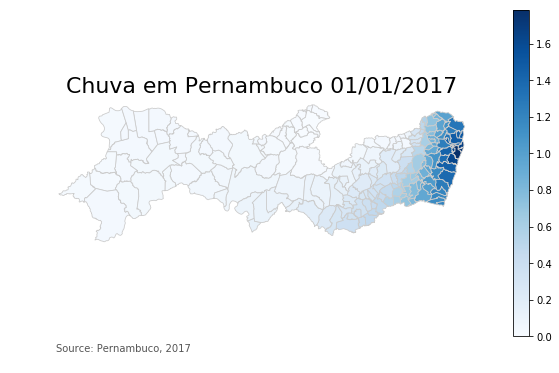

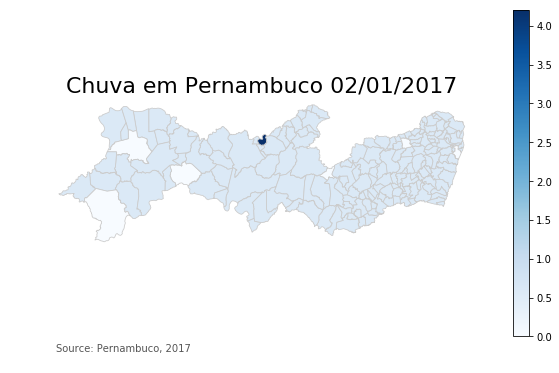

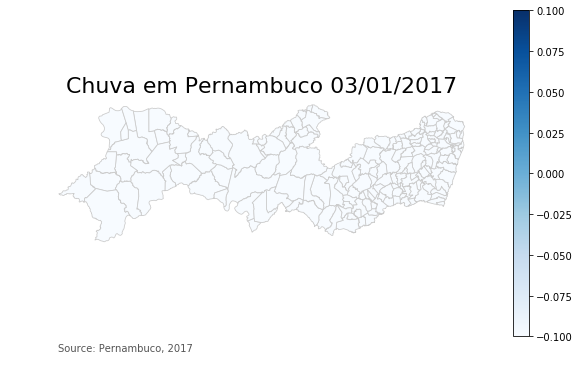

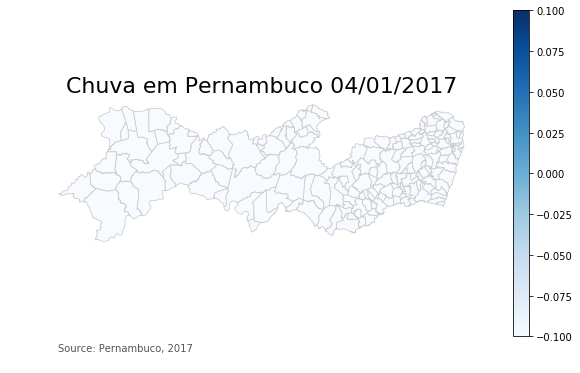

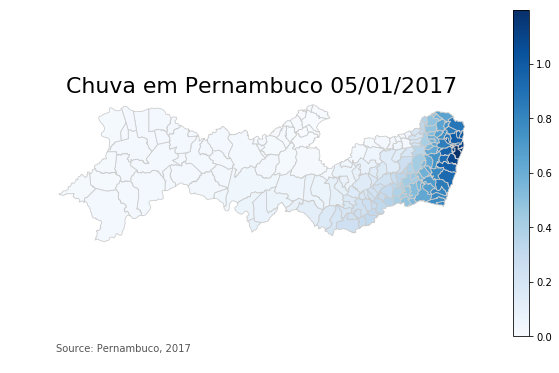

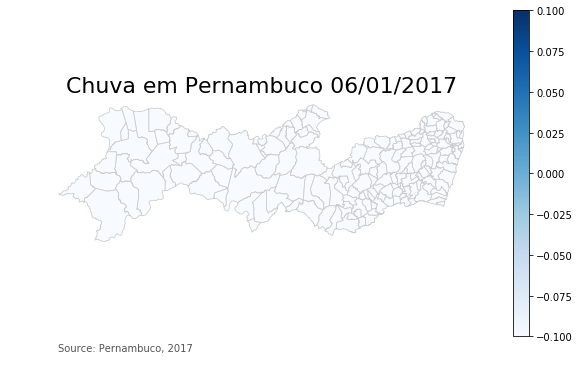

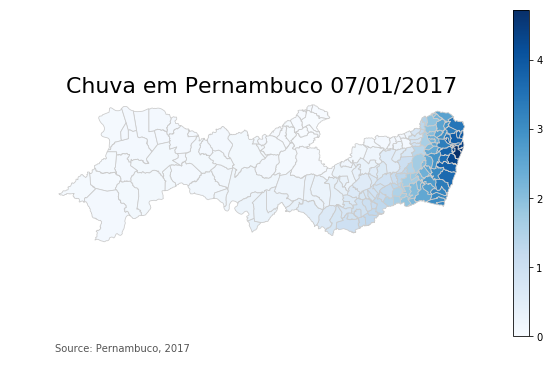

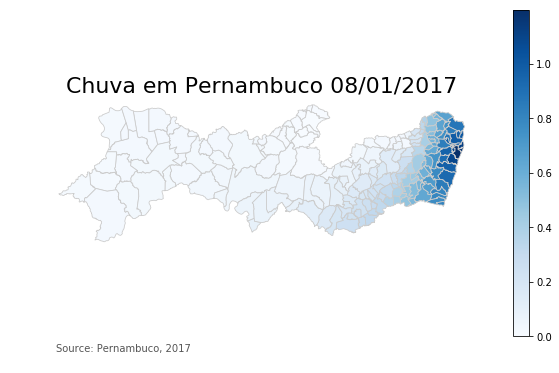

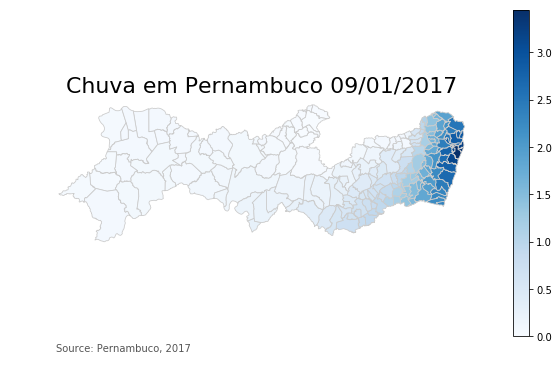

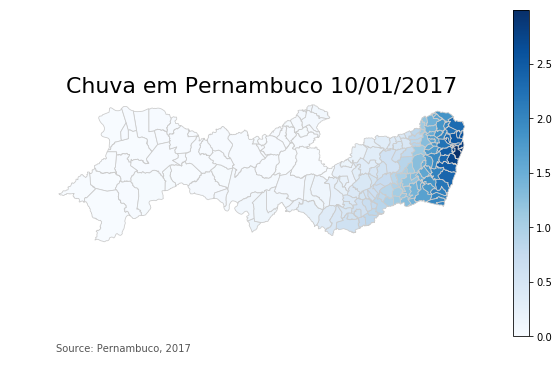

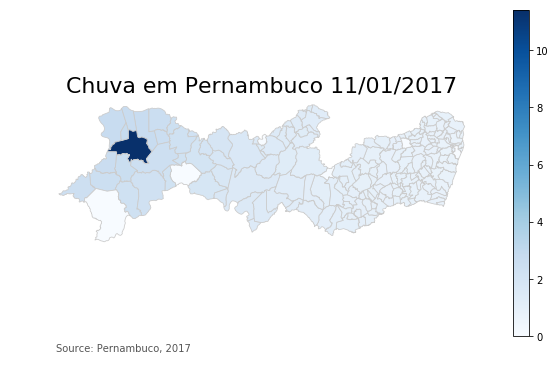

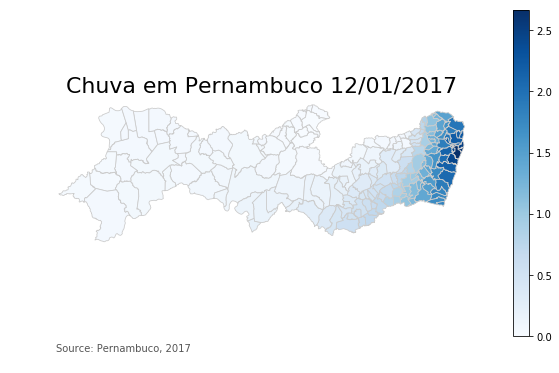

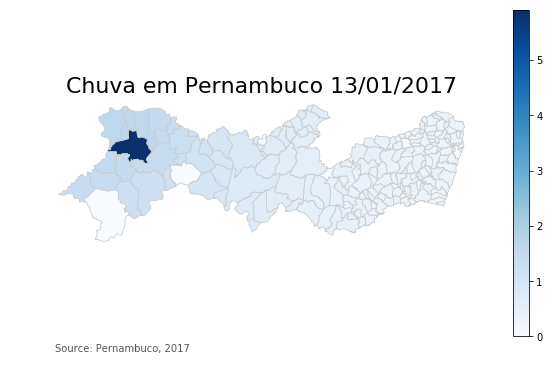

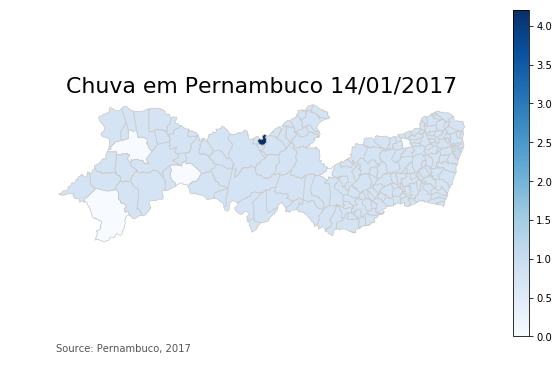

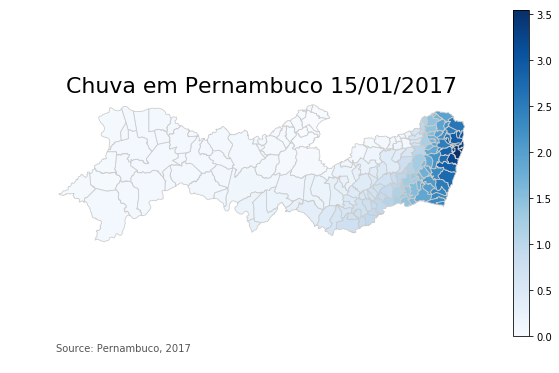

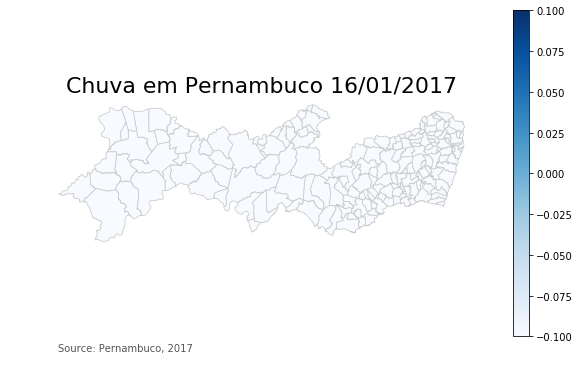

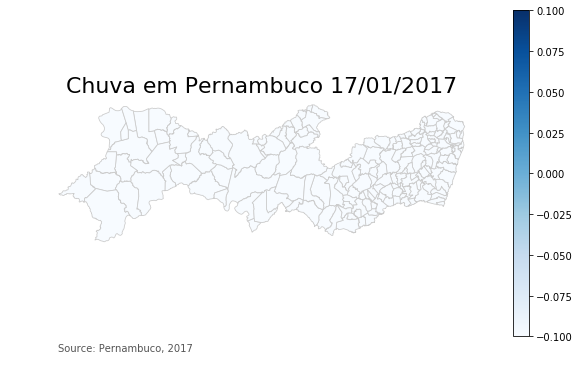

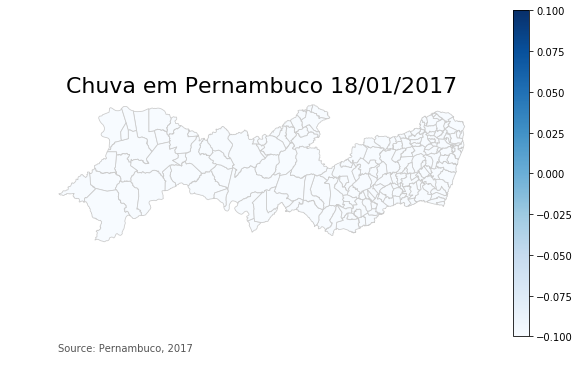

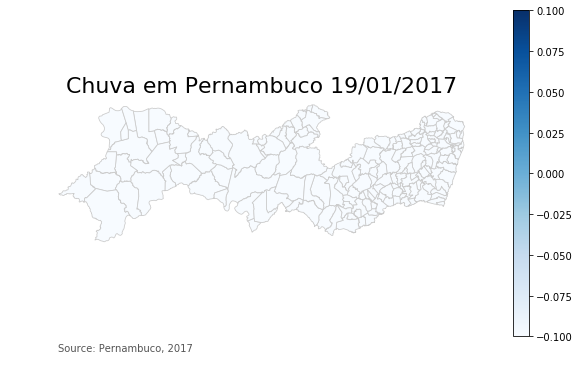

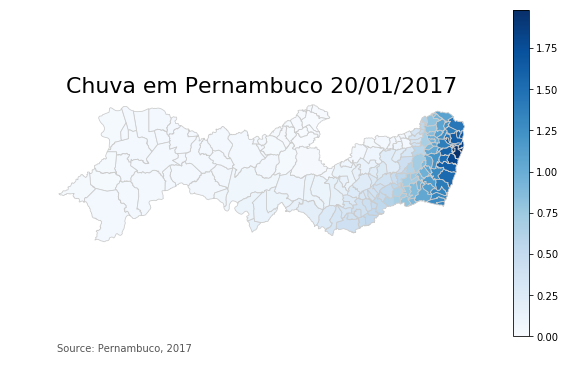

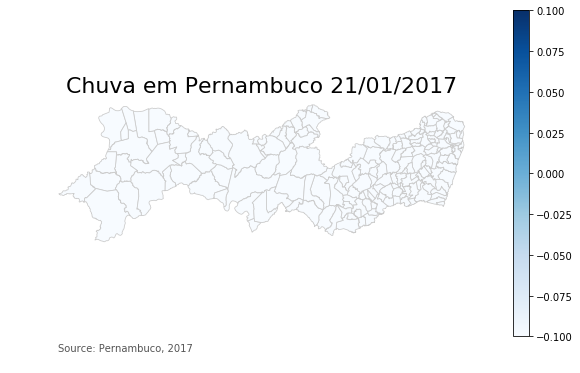

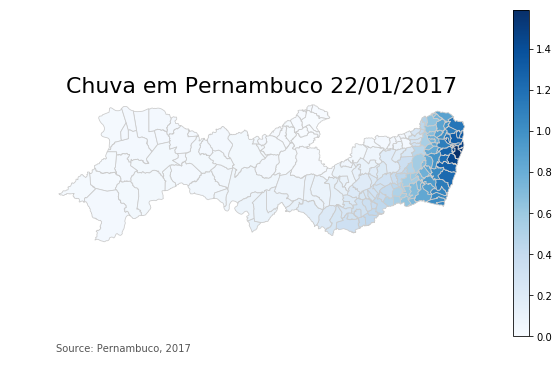

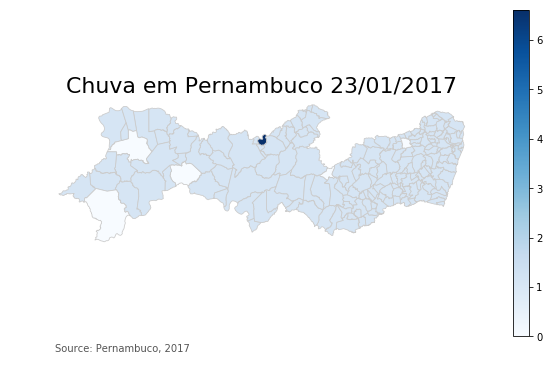

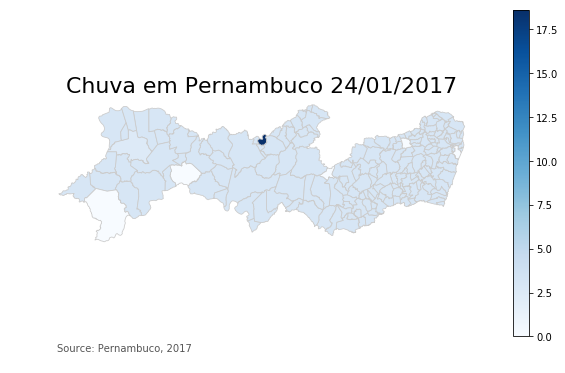

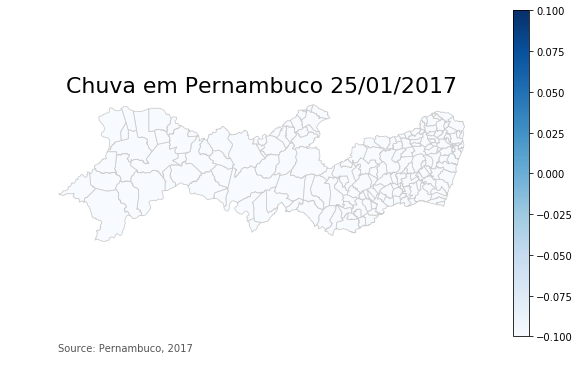

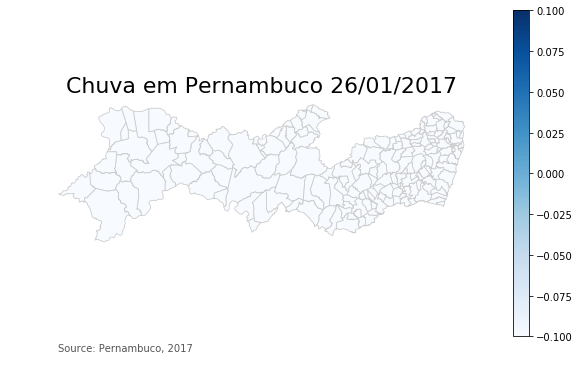

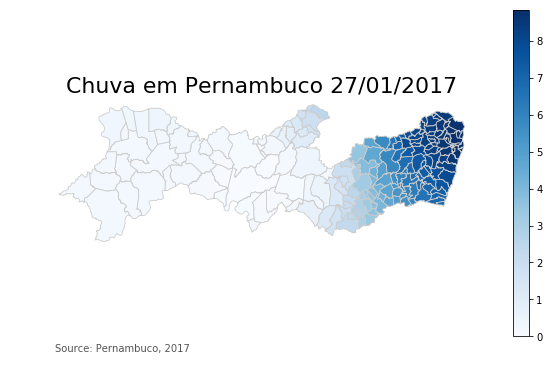

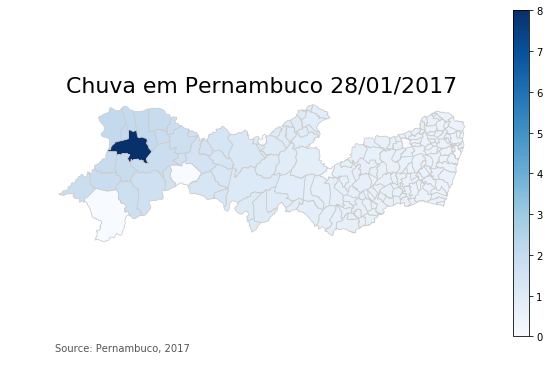

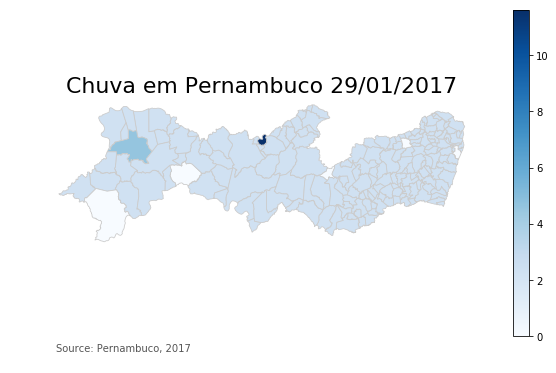

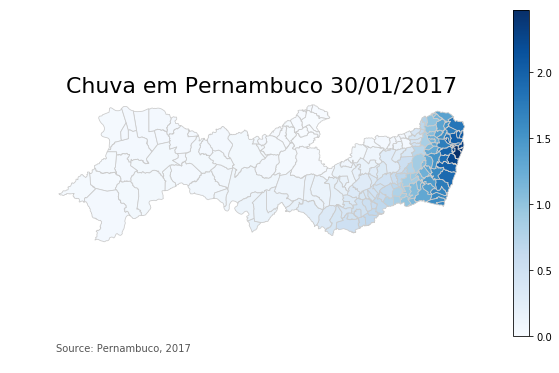

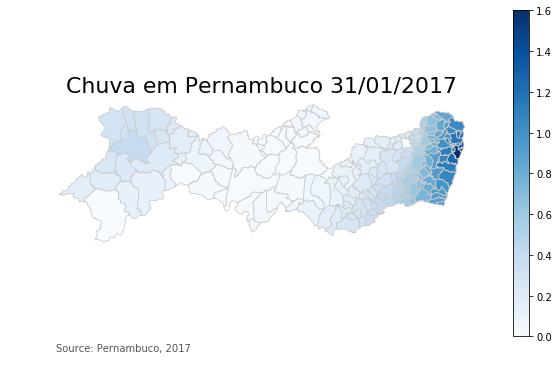

In [45]:
hetmaps = list(map(lambda day: build_hetmap_day(df_2017_1, day), 
                                      df_2017_1["Date"].unique().tolist()))